In [1]:
from kernels.kernel_helmholtz_equation import k_ff, k_uf, k_fu, gram_Matrix, k_uu
from main_class import PhysicsInformedGP_regressor
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\PI_GP_regressor\main_class.py:779: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\PI_GP_regressor\main_class.py:789: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\PI_GP_regressor\main_class.py:820: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\PI_GP_regressor\main_class.py:830: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


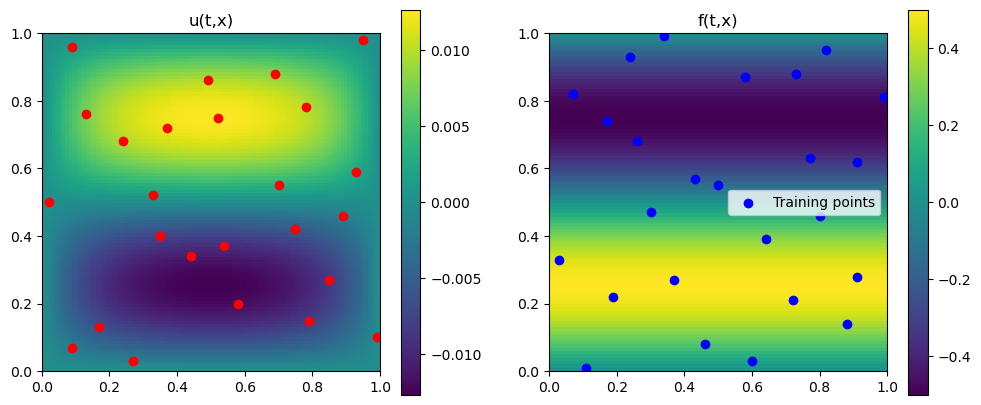

In [2]:
kernel = [gram_Matrix,k_uu,k_uf,k_fu,k_ff]
params = ["l","sigma_f","k"]
model = PhysicsInformedGP_regressor(kernel,timedependence=True, params = params)
model.set_training_data("data_files/helmholtz_data.csv",n_training_points=25,noise=[1e-8,1e-8])
model.plot_raw_data(Training_points=True,heat_map=True)
model.set_validation_data(4000)

In [6]:
def get_initial_values():
        """returns the initial values for the hyperparameters
        for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
        """
        rng = np.random.default_rng()
        theta_initial = np.zeros((3))
        theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
        theta_initial[1] = rng.uniform(0, 1, 1)
        theta_initial[2] = rng.uniform(0,2)
        return theta_initial
n_iterations, n_threads = 800, 10

model.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None),(1e-5,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})

100%|██████████| 800/800 [03:16<00:00,  4.07it/s]


     fun: -62.82341766357422
     jac: array([ -1.8387756, 338.78516  ,   1.9352031], dtype=float32)
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 70
     nit: 2
  status: 1
 success: True
       x: array([3.50020180e-01, 2.28623758e-04, 1.22092551e+00])


In [9]:
model.log_marginal_likelohood([3.50020180e-01, 2.28623758e-04, 1.20836548e+00])

Array(-62.8425, dtype=float32)

-----------------------------------------------
GP with kernel: 
Training data: (25, 2)
Training targets: (50, 1)
Hyperparameters: {'l': 0.5985831506134051, 'sigma_f': 0.288675663886384, 'k': 1.3350810103578636}
Log marginal likelihood: -34.7086181640625
Mean squared error: {'u': 4.866627705268911e-07, 'f': 9.544700151309371e-05}
-----------------------------------------------



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\PI_GP_regressor\main_class.py:543: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\PI_GP_regressor\main_class.py:551: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 c:\Users\Razer\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MSE_u:  0.00010027419970426727
MSE_f:  0.24752509575336537


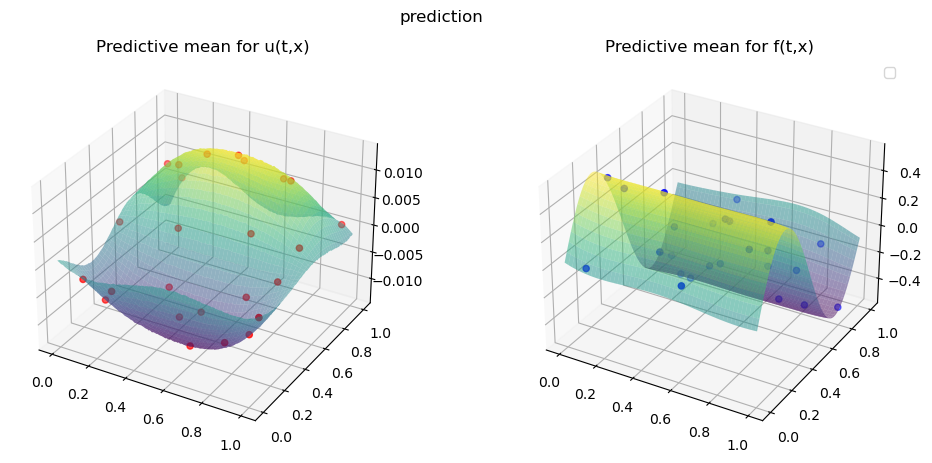

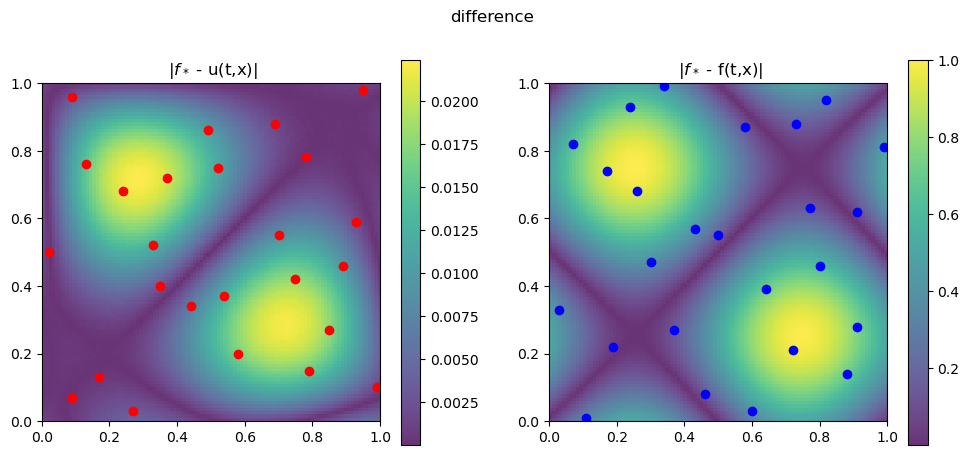

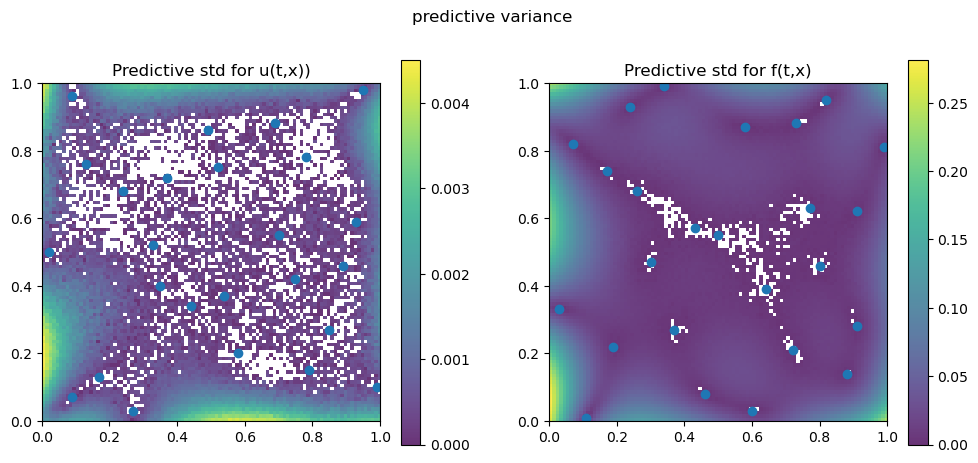

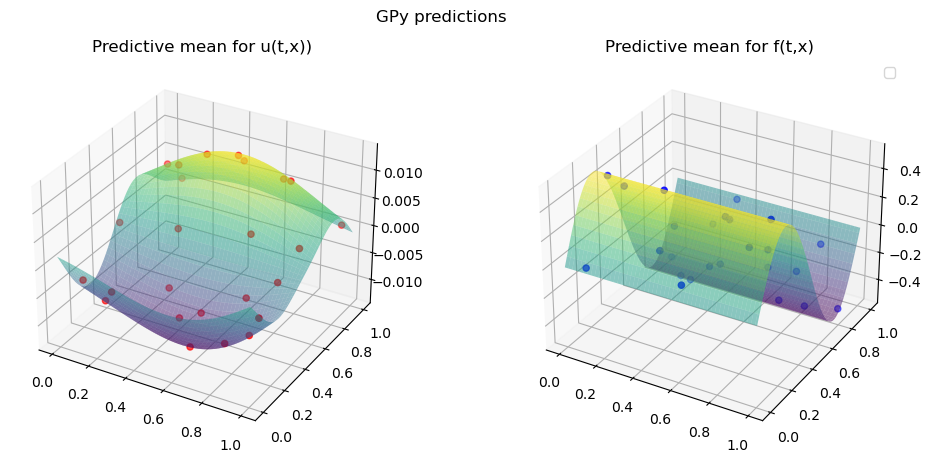

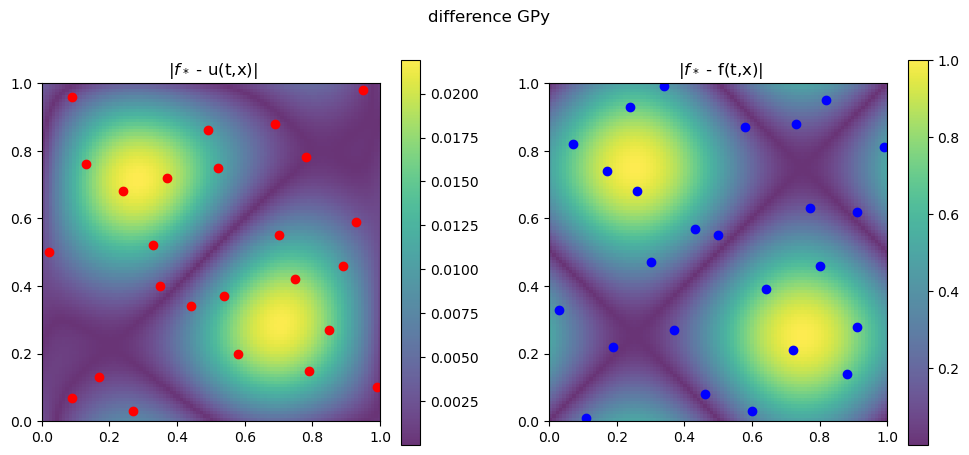

In [5]:
n_test_points = 100
x_star, y_star = np.meshgrid(np.linspace(0, 1, n_test_points), np.linspace(0, 1, n_test_points))
X_star = np.hstack((x_star.reshape(-1, 1), y_star.reshape(-1, 1)))
model.predict_model(X_star)
model.error()
print(model)
#now we can plot the results
model.plot_prediction(X_star, "prediction", "plots/helm_eq/prediction.png",heat_map=False)
model.plot_difference("difference", "plots/helm_eq/difference.png")
model.plot_variance(X_star, "predictive variance", "plots/helm_eq/predictive_variance.png")
model.use_GPy(X_star, "plots/helm_eq/GPy_model.png")
model.plot_difference_GPy("difference GPy ", "plots/helm_eq/difference_GPy.png")
